<Axes: xlabel='DATE'>

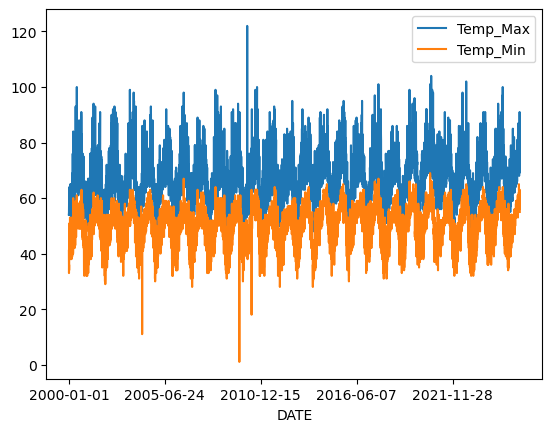

In [1]:
import pandas as pd
analyse_weather = pd.read_csv("imp_weather.csv",index_col = "DATE")
analyse_weather.head()
analyse_weather[["Temp_Max","Temp_Min"]].plot()


<Axes: xlabel='DATE'>

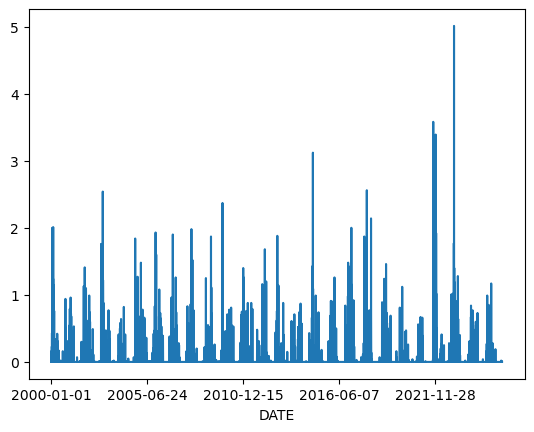

In [2]:
analyse_weather["Precipitation"].plot()

In [3]:
#Now I want to predict temp_max of tomorrow cz i hate hot weather and low weathers chill tbh. Btw how did 5 come in precipitation axis haha 
#create a new column named target
analyse_weather["Target_Temp"] = analyse_weather.shift(-1)["Temp_Max"].copy()
analyse_weather

#last value will be NaN so u gotta remove that

,Precipitation,Temp_Max,Temp_Min,Target_Temp
DATE,,,,
2000-01-01,0.00,54.0,41.0,54.0
2000-01-02,0.00,54.0,34.0,55.0
2000-01-03,0.00,55.0,33.0,54.0
2000-01-04,0.01,54.0,35.0,59.0
2000-01-05,0.00,59.0,36.0,58.0
...,...,...,...,...
2025-09-23,0.00,91.0,56.0,78.0
2025-09-24,0.00,78.0,63.0,72.0
2025-09-25,0.01,72.0,59.0,75.0


In [4]:
analyse_weather = analyse_weather.iloc[:-1] #analyse_weather = analyse_weather.loc[analyse_weather.index[:-1]]

In [5]:
from sklearn.linear_model import Ridge

Regress = Ridge(alpha= .1)
predictor = ["Precipitation","Temp_Max","Temp_Min"]
Train_Data = analyse_weather.loc[ : "2021-12-31"]
Test_Data = analyse_weather.loc ["2022-01-01": ]
#basically Regress fit(X,y)
Regress.fit(Train_Data[predictor], Train_Data["Target_Temp"])
        
#basic regression model fitting u know dis



Ridge(alpha=0.1)

In [6]:
pred = Regress.predict(Test_Data[predictor])

#zzzzzzzzzzzzzzzzzz

In [7]:
from sklearn.metrics import mean_absolute_error

In [8]:
mean_absolute_error(Test_Data["Target_Temp"], pred)

3.2827747380734316

In [9]:
#means we r on avg 3.28 degrees of the actual temp. COOKEDD

In [10]:
compare = pd.concat( [Test_Data["Target_Temp"], pd.Series(pred, index = Test_Data .index)], axis =1)
compare.columns = ["Actual", "Predictions"]
compare

,Actual,Predictions
DATE,,
2022-01-01,55.0,53.163373
2022-01-02,54.0,55.483255
2022-01-03,57.0,56.147640
2022-01-04,57.0,59.902672
2022-01-05,55.0,59.997378
...,...,...
2025-09-22,91.0,78.753874
2025-09-23,78.0,85.134672
2025-09-24,72.0,77.122029


<Axes: xlabel='DATE'>

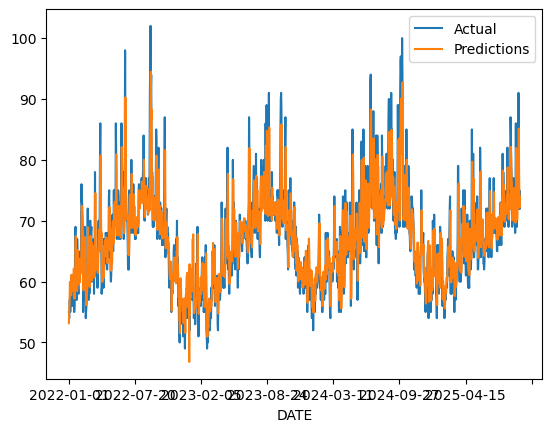

In [11]:
#bro im throwing my model in trash can 
#WHAT HAPPENED AT 22 SEP 2025 I GOTTA SEE
compare.plot()


In [12]:
#doesnt look as bad, lets see what each test_data has effect on y
Regress.coef_



#prec has - effect, temp max + means higher max temp so high temp tomorroww

array([-2.66715966,  0.70897757,  0.17200934])

In [13]:
#this is so messyyy now gotta finilise

In [14]:
analyse_weather = analyse_weather.copy()
def Create_Predictions(pred, analyse_weather, Regress):
        Train_Data = analyse_weather.loc[ : "2021-12-31"]
        Test_Data = analyse_weather.loc ["2022-01-01": ]
        Regress.fit(Train_Data[predictor], Train_Data["Target_Temp"])
        pred = Regress.predict(Test_Data[predictor])
        error = mean_absolute_error(Test_Data["Target_Temp"], pred)
        compare = pd.concat( [Test_Data["Target_Temp"], pd.Series(pred, index = Test_Data .index)], axis =1)
        compare.columns = ["Actual", "Predictions"]
        return error, compare

In [15]:
analyse_weather.loc[:, "Monthly_Max"] = analyse_weather["Temp_Max"].rolling(30).mean() #Recent temperature trend over past 30 days

In [16]:
analyse_weather


,Precipitation,Temp_Max,Temp_Min,Target_Temp,Monthly_Max
DATE,,,,,
2000-01-01,0.00,54.0,41.0,54.0,NaN
2000-01-02,0.00,54.0,34.0,55.0,NaN
2000-01-03,0.00,55.0,33.0,54.0,NaN
2000-01-04,0.01,54.0,35.0,59.0,NaN
2000-01-05,0.00,59.0,36.0,58.0,NaN
...,...,...,...,...,...
2025-09-22,0.00,82.0,56.0,91.0,74.633333
2025-09-23,0.00,91.0,56.0,78.0,75.366667
2025-09-24,0.00,78.0,63.0,72.0,75.600000


In [17]:
analyse_weather.iloc[30: ].copy() #cz cant pass NaN to model gievs error

,Precipitation,Temp_Max,Temp_Min,Target_Temp,Monthly_Max
DATE,,,,,
2000-01-31,0.01,56.0,49.0,60.0,57.333333
2000-02-01,0.00,60.0,50.0,65.0,57.533333
2000-02-02,0.00,65.0,48.0,65.0,57.866667
2000-02-03,0.18,65.0,50.0,62.0,58.233333
2000-02-04,0.00,62.0,49.0,58.0,58.333333
...,...,...,...,...,...
2025-09-22,0.00,82.0,56.0,91.0,74.633333
2025-09-23,0.00,91.0,56.0,78.0,75.366667
2025-09-24,0.00,78.0,63.0,72.0,75.600000


In [18]:
analyse_weather.loc[ :,"Monthly_Day_Max"] = analyse_weather["Monthly_Max"]/ analyse_weather["Temp_Max"] # 30 day avg / todays temp. if >1 means colder today
analyse_weather.loc[ :,"Ratio_Max_Min"] = analyse_weather["Temp_Max"]/ analyse_weather["Temp_Min"] # basically tells max temp today/ min temp today. Higher value means more temp variance. dont want that
pred = ["Precipitation", "Temp_Max", "Temp_Min", "Monthly_Max","Monthly_Day_Max","Ratio_Max_Min"]#X basically

error, compare = Create_Predictions(pred,analyse_weather,Regress)

In [19]:
error

3.2827747380734316

<Axes: xlabel='DATE'>

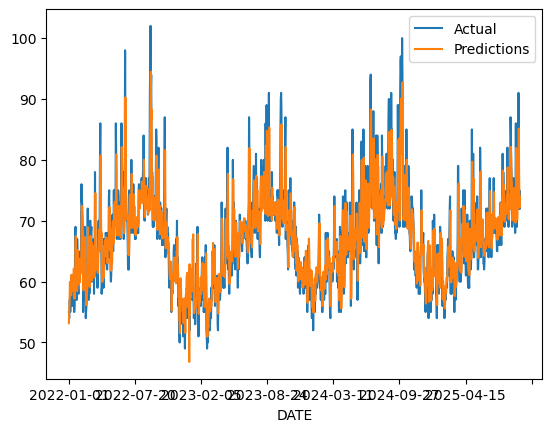

In [20]:
compare.plot()

In [21]:
#analyse_weather.index broo why was it object i spent so much timee on these. always check type
analyse_weather.index = pd.to_datetime(analyse_weather.index)
analyse_weather["Monthly_avg"] = analyse_weather["Temp_Max"].groupby(analyse_weather.index.month).transform(lambda x: x.expanding().mean())

In [22]:
analyse_weather["Temp_day_year"] = analyse_weather["Temp_Max"].groupby(analyse_weather.index.day_of_year).transform(lambda x: x.expanding().mean()) 
#this is basically checking hows today temp compared to all the temp that were today. like 1-1-2000 will be compared with 1-1-1999. same logic for monthly avg

In [28]:
analyse_weather["Month"] = analyse_weather.index.month
analyse_weather["DayOfYear"] = analyse_weather.index.dayofyear
analyse_weather["DayOfWeek"] = analyse_weather.index.dayofweek
pred = ["Precipitation", "Temp_Max", "Temp_Min", "Monthly_Max","Monthly_Day_Max","Ratio_Max_Min","Monthly_avg","Temp_day_yaer","Month","DayOfYear","DayOfWeek"]

error, compare = Create_Predictions(pred,analyse_weather,Regress)

In [29]:
error

3.2827747380734316